https://discuss.d2l.ai/t/linear-regression-from-scratch/43/24
bobbyfyb

In [1]:
%matplotlib inline
from d2l import torch as d2l
import torch
import random

In [2]:
def synthetic_data(w, b, num_examples):
    """ Generate y = Xw + b + noise. """
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [3]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-1.0721,  0.1169]) 
label: tensor([1.6687])


In [4]:
d2l.set_figsize()

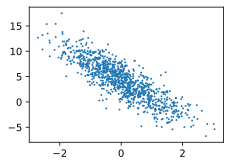

In [5]:
# The semicolon is for displaying the plot only
d2l.plt.scatter(d2l.numpy(features[:, 1]), d2l.numpy(labels), 1)

In [6]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    #The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
batch_size = 10

In [7]:
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.2026, -0.1113],
        [ 0.3457,  0.1370],
        [ 1.2557, -0.9251],
        [-0.8760,  0.9536],
        [ 0.0833, -0.5384],
        [ 1.0291,  1.3780],
        [-0.6891, -0.6218],
        [-0.9790, -0.9300],
        [ 0.9727,  0.0073],
        [ 1.3178,  0.0913]]) 
 tensor([[ 4.9856],
        [ 4.4192],
        [ 9.8521],
        [-0.8044],
        [ 6.1997],
        [ 1.5886],
        [ 4.9396],
        [ 5.4078],
        [ 6.1099],
        [ 6.5176]])


In [8]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [9]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X, w) + b

In [10]:
def  squared_loss(y_hat, y):
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [11]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    for param in params:
        param.data.sub_(lr*param.grad/batch_size)
        param.grad.data.zero_()

In [12]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [13]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) # Minibatch loss in 'X' and 'y'
        # Compute gradient on 'l' with respect to ['w', 'b']
        l.sum.backward()
        sgd([w, b], lr, batch_size) # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch{epoch+1}, loss{float(train_l.mean()):f}')

AttributeError: 'builtin_function_or_method' object has no attribute 'backward'

In [14]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) # Minibatch loss in 'X' and 'y'
        # Compute gradient on 'l' with respect to ['w', 'b']
        l.backward()
        sgd([w, b], lr, batch_size) # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch{epoch+1}, loss{float(train_l.mean()):f}')

RuntimeError: grad can be implicitly created only for scalar outputs

In [15]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) # Minibatch loss in 'X' and 'y'
        # Compute gradient on 'l' with respect to ['w', 'b']
        l.sum().backward()
        sgd([w, b], lr, batch_size) # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch{epoch+1}, loss{float(train_l.mean()):f}')

epoch1, loss0.043350
epoch2, loss0.000172
epoch3, loss0.000050
